In [48]:
import pandas as pd
df = pd.read_csv("spam (1).csv")


In [49]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [50]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [51]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [53]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [55]:
df_filled = df.fillna(df.mean())


C:\Users\PREDATOR\AppData\Local\Temp/ipykernel_16156/1748368490.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled = df.fillna(df.mean())


In [56]:
df.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [114]:
df['target'] = encoder.fit_transform(df['target'])


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [60]:
df.dtypes

v1    object
v2    object
dtype: object

In [39]:
len(df)

5572

In [61]:
df.shape


(5572, 2)

In [62]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [64]:
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
df.duplicated().sum()


403

In [66]:
df = df.drop_duplicates(keep='first')


In [67]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

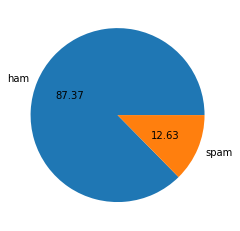

In [68]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [109]:
import nltk
nltk.download('punkt',quiet=True)

True

In [110]:
#la longueur de chaque texte dans la colonne 'text' de notre DataFrame df et stockage des valeurs dans une nouvelle colonne appelée 'characters'.

df['characters'] = df['text'].apply(len)

In [111]:
#calcul du nombre de mots dans chaque texte de la colonne 'text'
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [112]:
#ce code permet de compter le nombre de phrases dans chaque texte en utilisant la tokenisation de phrases fournie par NLTK
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [113]:
df.head()


,target,text,characters,words,sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
df[['characters','words','sentences']].describe()


,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


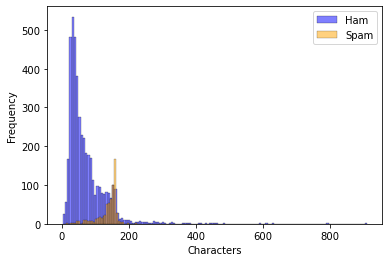

In [80]:
## Affichage du graphique contenant les histogrammes des caractères dans les textes "ham" et "spam"
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df[df['target'] == 'ham']['characters'], color='blue', alpha=0.5, label='Ham')
sns.histplot(df[df['target'] == 'spam']['characters'], color='orange', alpha=0.5, label='Spam')

plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.legend()

plt.show()


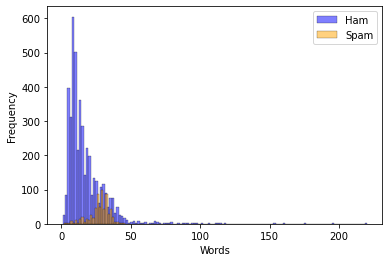

In [81]:
# Affichage du graphique contenant les histogrammes du nombre de mots dans les textes "ham" et "spam"import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df[df['target'] == 'ham']['words'], color='blue', alpha=0.5, label='Ham')
sns.histplot(df[df['target'] == 'spam']['words'], color='orange', alpha=0.5, label='Spam')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.legend()


plt.show()

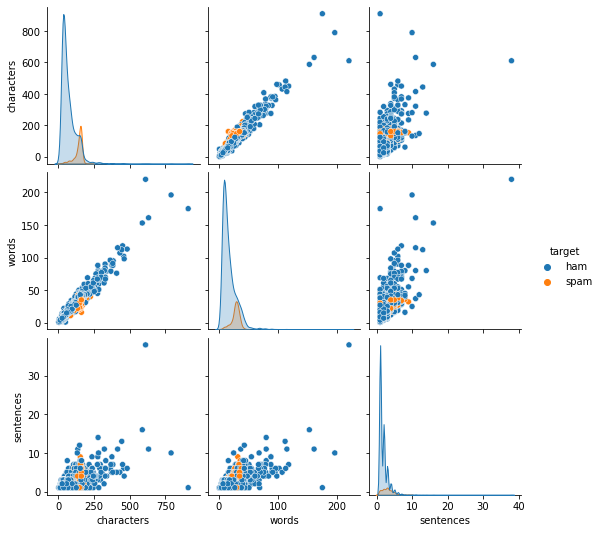

In [82]:
# Tracer une grille de graphiques de paires en fonction de la colonne 'target'
sns.pairplot(df, hue='target')

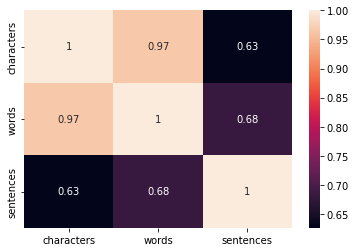

In [83]:
# Calcule de la matrice de correlation 
numeric_df = df.select_dtypes(include=['float64','int32','int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [104]:
# Importation du module string pour manipuler les caractères de ponctuation
import string 
# Affichage de la liste des caractères de ponctuation disponibles
string.punctuation
# Importation de la liste de mots vides de la bibliothèque NLTK
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
# Initialisation de l'objet PorterStemmer pour la racinisation des mots
ps = PorterStemmer()

In [105]:
def transform(text):
        # Convertir le texte en minuscules
    text = text.lower()                     
    text = nltk.word_tokenize(text) 
    
        # Filtrer les mots alphanumériques et les stocker dans la liste y
    y=[]
    for i in text:
        if i.isalnum():                     
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                         
        if i not in english_stopwords and i not in string.punctuation:
            y.append(i)
        # Copier la liste filtrée dans la variable text et vider la liste y        
    text = y[:]
    y.clear()
    # Effectuer la racinisation des mots et les stocker dans la liste y
    for i in text:
        y.append(ps.stem(i))                
            
    return " ".join(y)

In [107]:
df['transformed_text'] = df['text'].apply(transform)


In [108]:
df.head()


,target,text,characters,words,sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [123]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [89]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [130]:
# Initialiser une liste vide pour stocker les mots du corpus de spam
spam_corpus = [] 
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [131]:
#Calculer la longueur totale du corpus de spam (nombre total de mots)
len(spam_corpus)

9939

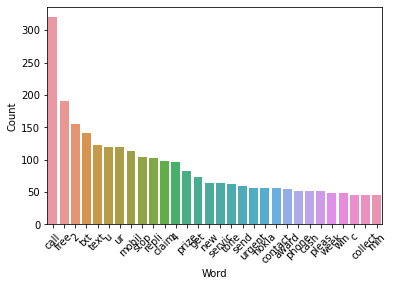

In [132]:
# Importation de la classe Counter pour compter les occurrences des mots
from collections import Counter
word_counter = Counter(spam_corpus)

word_counts_df = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Count'])


sns.barplot(x='Word', y='Count', data=word_counts_df)

plt.xticks(rotation=45)
plt.show()

In [133]:
# Initialiser une liste vide pour stocker les mots du corpus de ham
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [134]:
len(ham_corpus)

35402

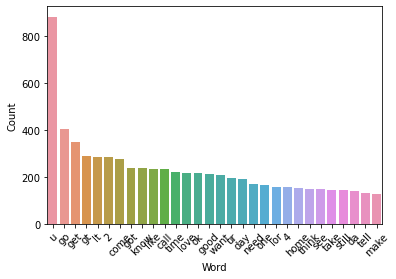

In [135]:
word_counter2 = Counter(ham_corpus)

# Convert Counter data to a DataFrame
word_counts_df2 = pd.DataFrame(word_counter2.most_common(30), columns=['Word', 'Count'])

# Create a barplot using seaborn
sns.barplot(x='Word', y='Count', data=word_counts_df2)

plt.xticks(rotation=45)
plt.show()

In [136]:
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Divisez les données en ensembles d'entraînement et de test
X = df[['characters', 'words', 'sentences']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisez et entraînez le modèle KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
knn_pred = knn.predict(X_test)

# Évaluation des performances
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("F1 Score:", f1_score(y_test, knn_pred))


KNN Performance:
Accuracy: 0.9245647969052224
Precision: 0.768
Recall: 0.6620689655172414
F1 Score: 0.7111111111111111


In [ ]:
#Interprétation détaillée des performances du modèle KNN :

#Exactitude (Accuracy) :

#L'exactitude est de 0.9246, ce qui signifie que le modèle a correctement classé environ 92,46% des exemples de l'ensemble de test.
#Précision (Precision) :

#La précision est de 0.768, ce qui indique que lorsqu'il prédit qu'un message est un spam, environ 76,8% du temps, il a raison. En d'autres termes, parmi tous les messages que le modèle a prédits comme spam, 76,8% d'entre eux étaient effectivement des spam.
#Rappel (Recall) :

#Le rappel est de 0.6621, ce qui signifie que le modèle a réussi à capturer environ 66,21% de tous les exemples réels de spam dans l'ensemble de test. En d'autres termes, parmi tous les exemples réels de spam, le modèle a correctement identifié environ 66,21% d'entre eux.
"Score F1 (F1 Score) :

#Le score F1 est de 0.7111, qui est la moyenne harmonique de la précision et du rappel. Il s'agit d'une mesure de l'équilibre entre la précision et le rappel. Un score F1 plus élevé indique un meilleur équilibre entre la précision et le rappel.
#En conclusion, le modèle KNN semble avoir de bonnes performances avec une exactitude élevée.

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Divisez les données en ensembles d'entraînement et de test
X = df[['characters', 'words', 'sentences']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisez et entraînez le modèle SVM
svm = SVC()
svm.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
svm_pred = svm.predict(X_test)

# Évaluation des performances
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))


SVM Performance:
Accuracy: 0.9235976789168279
Precision: 0.7894736842105263
Recall: 0.6206896551724138
F1 Score: 0.6949806949806949


In [ ]:
#Exactitude (Accuracy) :

#L'exactitude est de 0.9236, ce qui signifie que le modèle a correctement classé environ 92,36% des exemples de l'ensemble de test.
#Précision (Precision) :

#La précision est de 0.7895, ce qui indique que lorsqu'il prédit qu'un message est un spam, environ 78,95% du temps, il a raison. En d'autres termes, parmi tous les messages que le modèle a prédits comme spam, 78,95% d'entre eux étaient effectivement des spam.
#Rappel (Recall) :

#Le rappel est de 0.6207, ce qui signifie que le modèle a réussi à capturer environ 62,07% de tous les exemples réels de spam dans l'ensemble de test. En d'autres termes, parmi tous les exemples réels de spam, le modèle a correctement identifié environ 62,07% d'entre eux.
#Score F1 (F1 Score) :

#Le score F1 est de 0.6950, qui est la moyenne harmonique de la précision et du rappel. Il s'agit d'une mesure de l'équilibre entre la précision et le rappel. Un score F1 plus élevé indique un meilleur équilibre entre la précision et le rappel.
#En conclusion, le modèle SVM semble également avoir de bonnes performances avec une exactitude élevée.

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Créer un pipeline avec un vecteur TF-IDF et un classificateur SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

# Définir les hyperparamètres à rechercher dans la grille
parameters = {
    'tfidf__max_features': [100, 500, 1000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Initialiser GridSearchCV avec le pipeline et les paramètres
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)

# Exécuter la recherche sur grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et la meilleure performance
print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)
print("Meilleure performance (Accuracy) trouvée:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs paramètres trouvés:
{'svm__C': 1, 'svm__kernel': 'linear', 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2)}
Meilleure performance (Accuracy) trouvée: 0.9828295042321644
